In [1]:
using MacroModelling
			



In [ ]:
@model RBC begin
			1 / c[0] = (beta / c[1]) *
			(alpha * exp(z[1]) * k[0]^(alpha - 1)
			+ (1 - delta))
			
			c[0] + k[0] = (1 - delta) * k[-1] + q[0]
			
			q[0] = exp(z[0]) * k[-1]^alpha
			
			z[0] = rho_z * z[-1] + sigma_z * eps_z[x]
			end

       

Model:        RBC
Variables
 Total:       4
  Auxiliary:  0
 States:      2
  Auxiliary:  0
 Jumpers:     2
  Auxiliary:  0
Shocks:       1
Parameters:   5


In [15]:
@parameters RBC begin
           sigma_z = 0.01
           rho_z = 0.2
           delta = 0.02
           alpha = 0.5
           beta = 0.95
       end   

Remove redundant variables in non-stochastic steady state problem:	0.486 seconds
Set up non-stochastic steady state problem:				3.522 seconds
Find non-stochastic steady state:					0.132 seconds
Take symbolic derivatives up to first order:				1.021 seconds
Model:        RBC
Variables
 Total:       4
  Auxiliary:  0
 States:      2
  Auxiliary:  0
 Jumpers:     2
  Auxiliary:  0
Shocks:       1
Parameters:   5


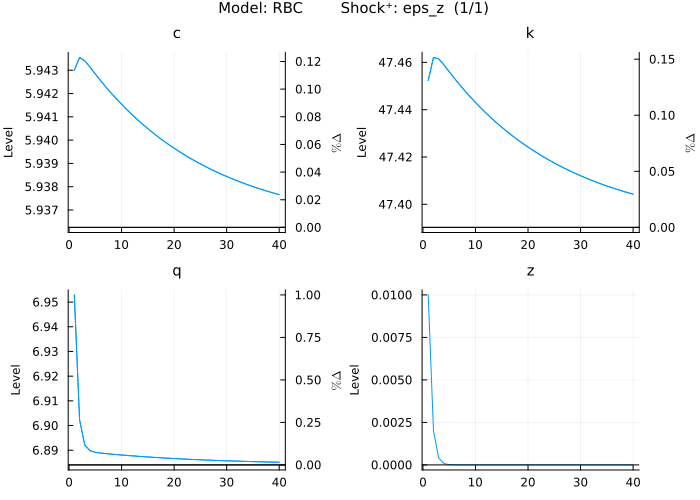

1-element Vector{Any}:
 Plot{Plots.GRBackend() n=14}

In [16]:
#using Pkg
#Pkg.add("StatsPlots")
using StatsPlots
plot_irf(RBC)


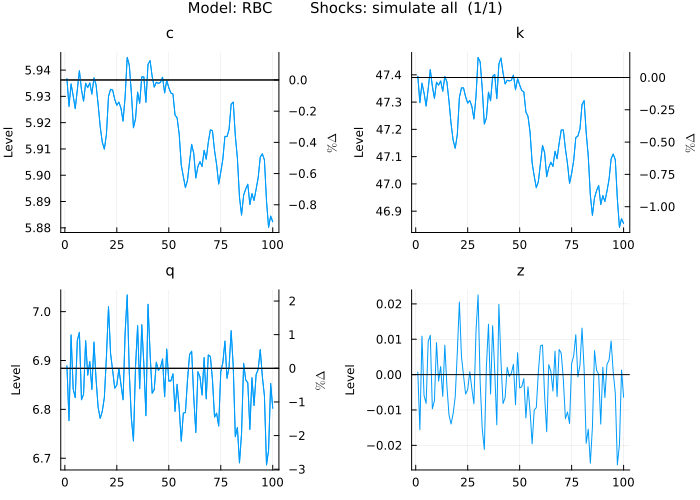

1-element Vector{Any}:
 Plot{Plots.GRBackend() n=14}

In [17]:
plot_simulations(RBC)


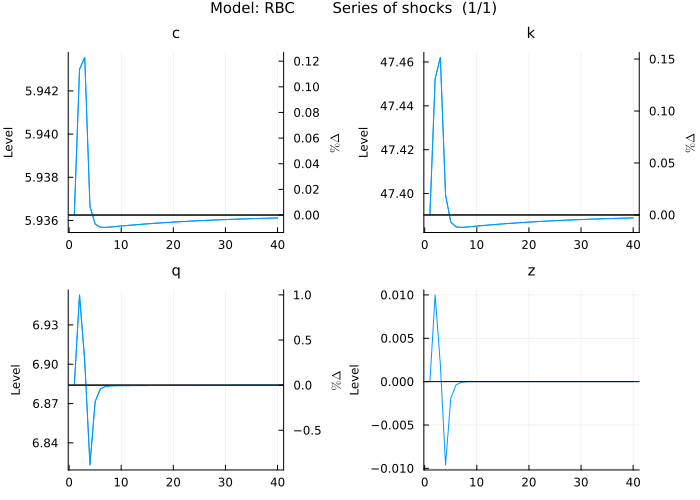

1-element Vector{Any}:
 Plot{Plots.GRBackend() n=14}

In [19]:
shock_series = zeros(1,4)

shock_series[1,2] = 1
shock_series[1,4] = -1
plot_irf(RBC, shocks = shock_series)


In [20]:
get_steady_state(RBC)

2-dimensional KeyedArray(NamedDimsArray(...)) with keys:
↓   Variables_and_calibrated_parameters ∈ 4-element Vector{Symbol}
→   Steady_state_and_∂steady_state∂parameter ∈ 6-element Vector{Symbol}
And data, 4×6 Matrix{Float64}:
        (:Steady_state)  (:sigma_z)  …     (:delta)   (:alpha)    (:beta)
  (:c)   5.93625          0.0            -116.072     55.786      76.1014
  (:k)  47.3903           0.0           -1304.95     555.264    1445.93
  (:q)   6.88406          0.0             -94.7805    66.8912    105.02
  (:z)   0.0              0.0               0.0        0.0         0.0

In [22]:
#Pkg.add("AxisKeys")
using AxisKeys

conditions = KeyedArray(Matrix{Union{Nothing,Float64}}(undef,1,4),Variables = [:c], Periods = 1:4)

conditions[1:4] .= [-.01,0,.01,.02];


In [23]:
using SparseArrays
shocks = spzeros(1,5)
shocks[1,5] = -1;
get_conditional_forecast(RBC, conditions, shocks = shocks, conditions_in_levels = false)

2-dimensional KeyedArray(NamedDimsArray(...)) with keys:
↓   Variables_and_shocks ∈ 5-element Vector{Symbol}
→   Periods ∈ 45-element UnitRange{Int64}
And data, 5×45 Matrix{Float64}:
               (1)          (2)           …  (44)           (45)
  (:c)          -0.01         0.0               0.0023348      0.00223402
  (:k)          -0.0920334   -0.00691984        0.0233205      0.0223139
  (:q)          -0.102033     0.0832729         0.00177022     0.0016938
  (:z)          -0.0148217    0.0130675        -3.6669e-30    -7.3338e-31
  (:eps_z₍ₓ₎)   -1.48217      1.60318     …     0.0            0.0

In [24]:
@model Smets_Wouters_2003 begin
           -q[0] + beta * ((1 - tau) * q[1] + epsilon_b[1] * (r_k[1] * z[1] - psi^-1 * r_k[ss] * (-1 + exp(psi * (-1 + z[1])))) * (C[1] - h * C[0])^(-sigma_c))
           -q_f[0] + beta * ((1 - tau) * q_f[1] + epsilon_b[1] * (r_k_f[1] * z_f[1] - psi^-1 * r_k_f[ss] * (-1 + exp(psi * (-1 + z_f[1])))) * (C_f[1] - h * C_f[0])^(-sigma_c))
           -r_k[0] + alpha * epsilon_a[0] * mc[0] * L[0]^(1 - alpha) * (K[-1] * z[0])^(-1 + alpha)
           -r_k_f[0] + alpha * epsilon_a[0] * mc_f[0] * L_f[0]^(1 - alpha) * (K_f[-1] * z_f[0])^(-1 + alpha)
           -G[0] + T[0]
           -G[0] + G_bar * epsilon_G[0]
           -G_f[0] + T_f[0]
           -G_f[0] + G_bar * epsilon_G[0]
           -L[0] + nu_w[0]^-1 * L_s[0]
           -L_s_f[0] + L_f[0] * (W_i_f[0] * W_f[0]^-1)^(lambda_w^-1 * (-1 - lambda_w))
           L_s_f[0] - L_f[0]
           L_s_f[0] + lambda_w^-1 * L_f[0] * W_f[0]^-1 * (-1 - lambda_w) * (-W_disutil_f[0] + W_i_f[0]) * (W_i_f[0] * W_f[0]^-1)^(-1 + lambda_w^-1 * (-1 - lambda_w))
           Pi_ws_f[0] - L_s_f[0] * (-W_disutil_f[0] + W_i_f[0])
           Pi_ps_f[0] - Y_f[0] * (-mc_f[0] + P_j_f[0]) * P_j_f[0]^(-lambda_p^-1 * (1 + lambda_p))
           -Q[0] + epsilon_b[0]^-1 * q[0] * (C[0] - h * C[-1])^(sigma_c)
           -Q_f[0] + epsilon_b[0]^-1 * q_f[0] * (C_f[0] - h * C_f[-1])^(sigma_c)
           -W[0] + epsilon_a[0] * mc[0] * (1 - alpha) * L[0]^(-alpha) * (K[-1] * z[0])^alpha
           -W_f[0] + epsilon_a[0] * mc_f[0] * (1 - alpha) * L_f[0]^(-alpha) * (K_f[-1] * z_f[0])^alpha
           -Y_f[0] + Y_s_f[0]
           Y_s[0] - nu_p[0] * Y[0]
           -Y_s_f[0] + Y_f[0] * P_j_f[0]^(-lambda_p^-1 * (1 + lambda_p))
           beta * epsilon_b[1] * (C_f[1] - h * C_f[0])^(-sigma_c) - epsilon_b[0] * R_f[0]^-1 * (C_f[0] - h * C_f[-1])^(-sigma_c)
           beta * epsilon_b[1] * pi[1]^-1 * (C[1] - h * C[0])^(-sigma_c) - epsilon_b[0] * R[0]^-1 * (C[0] - h * C[-1])^(-sigma_c)
           Y_f[0] * P_j_f[0]^(-lambda_p^-1 * (1 + lambda_p)) - lambda_p^-1 * Y_f[0] * (1 + lambda_p) * (-mc_f[0] + P_j_f[0]) * P_j_f[0]^(-1 - lambda_p^-1 * (1 + lambda_p))
           epsilon_b[0] * W_disutil_f[0] * (C_f[0] - h * C_f[-1])^(-sigma_c) - omega * epsilon_b[0] * epsilon_L[0] * L_s_f[0]^sigma_l
           -1 + xi_p * (pi[0]^-1 * pi[-1]^gamma_p)^(-lambda_p^-1) + (1 - xi_p) * pi_star[0]^(-lambda_p^-1)
           -1 + (1 - xi_w) * (w_star[0] * W[0]^-1)^(-lambda_w^-1) + xi_w * (W[-1] * W[0]^-1)^(-lambda_w^-1) * (pi[0]^-1 * pi[-1]^gamma_w)^(-lambda_w^-1)
           -Phi - Y_s[0] + epsilon_a[0] * L[0]^(1 - alpha) * (K[-1] * z[0])^alpha
           -Phi - Y_f[0] * P_j_f[0]^(-lambda_p^-1 * (1 + lambda_p)) + epsilon_a[0] * L_f[0]^(1 - alpha) * (K_f[-1] * z_f[0])^alpha
           std_eta_b * eta_b[x] - log(epsilon_b[0]) + rho_b * log(epsilon_b[-1])
           -std_eta_L * eta_L[x] - log(epsilon_L[0]) + rho_L * log(epsilon_L[-1])
           std_eta_I * eta_I[x] - log(epsilon_I[0]) + rho_I * log(epsilon_I[-1])
           std_eta_w * eta_w[x] - f_1[0] + f_2[0]
           std_eta_a * eta_a[x] - log(epsilon_a[0]) + rho_a * log(epsilon_a[-1])
           std_eta_p * eta_p[x] - g_1[0] + g_2[0] * (1 + lambda_p)
           std_eta_G * eta_G[x] - log(epsilon_G[0]) + rho_G * log(epsilon_G[-1])
           -f_1[0] + beta * xi_w * f_1[1] * (w_star[0]^-1 * w_star[1])^(lambda_w^-1) * (pi[1]^-1 * pi[0]^gamma_w)^(-lambda_w^-1) + epsilon_b[0] * w_star[0] * L[0] * (1 + lambda_w)^-1 * (C[0] - h * C[-1])^(-sigma_c) * (w_star[0] * W[0]^-1)^(-lambda_w^-1 * (1 + lambda_w))
           -f_2[0] + beta * xi_w * f_2[1] * (w_star[0]^-1 * w_star[1])^(lambda_w^-1 * (1 + lambda_w) * (1 + sigma_l)) * (pi[1]^-1 * pi[0]^gamma_w)^(-lambda_w^-1 * (1 + lambda_w) * (1 + sigma_l)) + omega * epsilon_b[0] * epsilon_L[0] * (L[0] * (w_star[0] * W[0]^-1)^(-lambda_w^-1 * (1 + lambda_w)))^(1 + sigma_l)
           -g_1[0] + beta * xi_p * pi_star[0] * g_1[1] * pi_star[1]^-1 * (pi[1]^-1 * pi[0]^gamma_p)^(-lambda_p^-1) + epsilon_b[0] * pi_star[0] * Y[0] * (C[0] - h * C[-1])^(-sigma_c)
           -g_2[0] + beta * xi_p * g_2[1] * (pi[1]^-1 * pi[0]^gamma_p)^(-lambda_p^-1 * (1 + lambda_p)) + epsilon_b[0] * mc[0] * Y[0] * (C[0] - h * C[-1])^(-sigma_c)
           -nu_w[0] + (1 - xi_w) * (w_star[0] * W[0]^-1)^(-lambda_w^-1 * (1 + lambda_w)) + xi_w * nu_w[-1] * (W[-1] * pi[0]^-1 * W[0]^-1 * pi[-1]^gamma_w)^(-lambda_w^-1 * (1 + lambda_w))
           -nu_p[0] + (1 - xi_p) * pi_star[0]^(-lambda_p^-1 * (1 + lambda_p)) + xi_p * nu_p[-1] * (pi[0]^-1 * pi[-1]^gamma_p)^(-lambda_p^-1 * (1 + lambda_p))
           -K[0] + K[-1] * (1 - tau) + I[0] * (1 - 0.5 * varphi * (-1 + I[-1]^-1 * epsilon_I[0] * I[0])^2)
           -K_f[0] + K_f[-1] * (1 - tau) + I_f[0] * (1 - 0.5 * varphi * (-1 + I_f[-1]^-1 * epsilon_I[0] * I_f[0])^2)
           U[0] - beta * U[1] - epsilon_b[0] * ((1 - sigma_c)^-1 * (C[0] - h * C[-1])^(1 - sigma_c) - omega * epsilon_L[0] * (1 + sigma_l)^-1 * L_s[0]^(1 + sigma_l))
           U_f[0] - beta * U_f[1] - epsilon_b[0] * ((1 - sigma_c)^-1 * (C_f[0] - h * C_f[-1])^(1 - sigma_c) - omega * epsilon_L[0] * (1 + sigma_l)^-1 * L_s_f[0]^(1 + sigma_l))
           -epsilon_b[0] * (C[0] - h * C[-1])^(-sigma_c) + q[0] * (1 - 0.5 * varphi * (-1 + I[-1]^-1 * epsilon_I[0] * I[0])^2 - varphi * I[-1]^-1 * epsilon_I[0] * I[0] * (-1 + I[-1]^-1 * epsilon_I[0] * I[0])) + beta * varphi * I[0]^-2 * epsilon_I[1] * q[1] * I[1]^2 * (-1 + I[0]^-1 * epsilon_I[1] * I[1])
           -epsilon_b[0] * (C_f[0] - h * C_f[-1])^(-sigma_c) + q_f[0] * (1 - 0.5 * varphi * (-1 + I_f[-1]^-1 * epsilon_I[0] * I_f[0])^2 - varphi * I_f[-1]^-1 * epsilon_I[0] * I_f[0] * (-1 + I_f[-1]^-1 * epsilon_I[0] * I_f[0])) + beta * varphi * I_f[0]^-2 * epsilon_I[1] * q_f[1] * I_f[1]^2 * (-1 + I_f[0]^-1 * epsilon_I[1] * I_f[1])
           std_eta_pi * eta_pi[x] - log(pi_obj[0]) + rho_pi_bar * log(pi_obj[-1]) + log(calibr_pi_obj) * (1 - rho_pi_bar)
           -C[0] - I[0] - T[0] + Y[0] - psi^-1 * r_k[ss] * K[-1] * (-1 + exp(psi * (-1 + z[0])))
           -calibr_pi + std_eta_R * eta_R[x] - log(R[ss]^-1 * R[0]) + r_Delta_pi * (-log(pi[ss]^-1 * pi[-1]) + log(pi[ss]^-1 * pi[0])) + r_Delta_y * (-log(Y[ss]^-1 * Y[-1]) + log(Y[ss]^-1 * Y[0]) + log(Y_f[ss]^-1 * Y_f[-1]) - log(Y_f[ss]^-1 * Y_f[0])) + rho * log(R[ss]^-1 * R[-1]) + (1 - rho) * (log(pi_obj[0]) + r_pi * (-log(pi_obj[0]) + log(pi[ss]^-1 * pi[-1])) + r_Y * (log(Y[ss]^-1 * Y[0]) - log(Y_f[ss]^-1 * Y_f[0])))
           -C_f[0] - I_f[0] + Pi_ws_f[0] - T_f[0] + Y_f[0] + L_s_f[0] * W_disutil_f[0] - L_f[0] * W_f[0] - psi^-1 * r_k_f[ss] * K_f[-1] * (-1 + exp(psi * (-1 + z_f[0])))
           epsilon_b[0] * (K[-1] * r_k[0] - r_k[ss] * K[-1] * exp(psi * (-1 + z[0]))) * (C[0] - h * C[-1])^(-sigma_c)
           epsilon_b[0] * (K_f[-1] * r_k_f[0] - r_k_f[ss] * K_f[-1] * exp(psi * (-1 + z_f[0]))) * (C_f[0] - h * C_f[-1])^(-sigma_c)
       end

Model:        Smets_Wouters_2003
Variables
 Total:       54
  Auxiliary:  0
 States:      19
  Auxiliary:  0
 Jumpers:     21
  Auxiliary:  0
Shocks:       9
Parameters:   39


In [25]:
@parameters Smets_Wouters_2003 begin
           lambda_p = .368
           G_bar = .362
           lambda_w = 0.5
           Phi = .819
       
           alpha = 0.3
           beta = 0.99
           gamma_w = 0.763
           gamma_p = 0.469
           h = 0.573
           omega = 1
           psi = 0.169
       
           r_pi = 1.684
           r_Y = 0.099
           r_Delta_pi = 0.14
           r_Delta_y = 0.159
       
           sigma_c = 1.353
           sigma_l = 2.4
           tau = 0.025
           varphi = 6.771
           xi_w = 0.737
           xi_p = 0.908
       
           rho = 0.961
           rho_b = 0.855
           rho_L = 0.889
           rho_I = 0.927
           rho_a = 0.823
           rho_G = 0.949
           rho_pi_bar = 0.924
       
           std_eta_b = 0.336
           std_eta_L = 3.52
           std_eta_I = 0.085
           std_eta_a = 0.598
           std_eta_w = 0.6853261
           std_eta_p = 0.7896512
           std_eta_G = 0.325
           std_eta_R = 0.081
           std_eta_pi = 0.017
       
           calibr_pi_obj | 1 = pi_obj[ss]
           calibr_pi | pi[ss] = pi_obj[ss]
       end

Remove redundant variables in non-stochastic steady state problem:	3.071 seconds
Set up non-stochastic steady state problem:				2.452 seconds
Find non-stochastic steady state:					

┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10


0.776 seconds
Take symbolic derivatives up to first order:				

┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10


1.926 seconds
Model:        Smets_Wouters_2003
Variables
 Total:       54
  Auxiliary:  0
 States:      19
  Auxiliary:  0
 Jumpers:     21
  Auxiliary:  0
Shocks:       9
Parameters:   39
Calibration
equations:    2


In [ ]:
import StatsPlots
plot_irf(Smets_Wouters_2003)

In [18]:
@model FS2000 begin
           dA[0] = exp(gam + z_e_a  *  e_a[x])
       
           log(m[0]) = (1 - rho) * log(mst)  +  rho * log(m[-1]) + z_e_m  *  e_m[x]
       
           - P[0] / (c[1] * P[1] * m[0]) + bet * P[1] * (alp * exp( - alp * (gam + log(e[1]))) * k[0] ^ (alp - 1) * n[1] ^ (1 - alp) + (1 - del) * exp( - (gam + log(e[1])))) / (c[2] * P[2] * m[1])=0
       
           W[0] = l[0] / n[0]
       
           - (psi / (1 - psi)) * (c[0] * P[0] / (1 - n[0])) + l[0] / n[0] = 0
       
           R[0] = P[0] * (1 - alp) * exp( - alp * (gam + z_e_a  *  e_a[x])) * k[-1] ^ alp * n[0] ^ ( - alp) / W[0]
       
           1 / (c[0] * P[0]) - bet * P[0] * (1 - alp) * exp( - alp * (gam + z_e_a  *  e_a[x])) * k[-1] ^ alp * n[0] ^ (1 - alp) / (m[0] * l[0] * c[1] * P[1]) = 0
       
           c[0] + k[0] = exp( - alp * (gam + z_e_a  *  e_a[x])) * k[-1] ^ alp * n[0] ^ (1 - alp) + (1 - del) * exp( - (gam + z_e_a  *  e_a[x])) * k[-1]
       
           P[0] * c[0] = m[0]
       
           m[0] - 1 + d[0] = l[0]
       
           e[0] = exp(z_e_a  *  e_a[x])
       
           y[0] = k[-1] ^ alp * n[0] ^ (1 - alp) * exp( - alp * (gam + z_e_a  *  e_a[x]))
       
           gy_obs[0] = dA[0] * y[0] / y[-1]
       
           gp_obs[0] = (P[0] / P[-1]) * m[-1] / dA[0]
       
           log_gy_obs[0] = log(gy_obs[0])
       
           log_gp_obs[0] = log(gp_obs[0])
       end

LoadError: LoadError: AssertionError: Not a function definition: FS2000
in expression starting at d:\julia_work\Short Course\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X15sZmlsZQ==.jl:1

In [11]:
@parameters FS2000 begin
           alp     = 0.356
           bet     = 0.993
           gam     = 0.0085
           mst     = 1.0002
           rho     = 0.129
           psi     = 0.65
           del     = 0.01
           z_e_a   = 0.035449
           z_e_m   = 0.008862
       end

Remove redundant variables in non-stochastic steady state problem:	1.526 seconds
Set up non-stochastic steady state problem:				5.168 seconds
Find non-stochastic steady state:					1.42 seconds
Take symbolic derivatives up to first order:				2.451 seconds
Model:        FS2000
Variables
 Total:       18
  Auxiliary:  2
 States:      4
  Auxiliary:  0
 Jumpers:     7
  Auxiliary:  2
Shocks:       2
Parameters:   9


In [12]:
#using Pkg
#Pkg.add("CSV")
using CSV, DataFrames, AxisKeys
dat = CSV.read("FS2000_data.csv", DataFrame)
data = KeyedArray(Array(dat)',Variable = Symbol.("log_".*names(dat)),Time = 1:size(dat)[1])
data = log.(data)
observables = sort(Symbol.("log_".*names(dat)))
data = data(observables,:)

2-dimensional KeyedArray(NamedDimsArray(...)) with keys:
↓   Variable ∈ 2-element view(::Vector{Symbol},...)
→   Time ∈ 192-element UnitRange{Int64}
And data, 2×192 view(::Matrix{Float64}, [2, 1], :) with eltype Float64:
                 (1)          (2)          …  (191)           (192)
  (:log_gp_obs)   -0.0044494    0.0038943         0.00295712      0.00285919
  (:log_gy_obs)    0.0376443    0.026348          0.00793817      0.00487735

In [13]:
#using Pkg
#Pkg.add("DynamicPPL")
#Pkg.add("Turing")
#Pkg.add("ADTypes")
#Pkg.add("Zygote")

import DynamicPPL

import Turing

import Turing: NUTS, sample, logpdf

import ADTypes: AutoZygote

import Zygote

#import Distributions

prior_distributions = [
           Beta(0.356, 0.02, μσ = true),           # alp
           Beta(0.993, 0.002, μσ = true),          # bet
           Normal(0.0085, 0.003),                  # gam
           Normal(1.0002, 0.007),                  # mst
           Beta(0.129, 0.223, μσ = true),          # rho
           Beta(0.65, 0.05, μσ = true),            # psi
           Beta(0.01, 0.005, μσ = true),           # del
           InverseGamma(0.035449, Inf, μσ = true), # z_e_a
           InverseGamma(0.008862, Inf, μσ = true)  # z_e_m
       ]

9-element Vector{Distributions.Distribution{Distributions.Univariate, Distributions.Continuous}}:
 Distributions.Beta{Float64}(α=203.68895999999998, β=368.47104)
 Distributions.Beta{Float64}(α=1724.5927500000016, β=12.157250000000023)
 Distributions.Normal{Float64}(μ=0.0085, σ=0.003)
 Distributions.Normal{Float64}(μ=1.0002, σ=0.007)
 Distributions.Beta{Float64}(α=0.16246596553318987, β=1.0969601238713826)
 Distributions.Beta{Float64}(α=58.499999999999986, β=31.49999999999999)
 Distributions.Beta{Float64}(α=3.95, β=391.05)
 Distributions.InverseGamma{Float64}(
invd: Distributions.Gamma{Float64}(α=2.0, θ=28.2095404665858)
θ: 0.035449
)

 Distributions.InverseGamma{Float64}(
invd: Distributions.Gamma{Float64}(α=2.0, θ=112.84134506883322)
θ: 0.008862
)


In [ ]:
Turing.@model function FS2000_loglikelihood_function(data, model)
           parameters ~ Turing.arraydist(prior_distributions)
       
           if DynamicPPL.leafcontext(__context__) !== DynamicPPL.PriorContext()
               Turing.@addlogprob! get_loglikelihood(model, data, parameters)
           end
       end

FS2000_loglikelihood = FS2000_loglikelihood_function(data, FS2000);

n_samples = 1000
chain_NUTS  = sample(FS2000_loglikelihood, NUTS(adtype = AutoZygote()), n_samples, progress = false);     

#using StatsPlots

plot(chain_NUTS)

┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\julia_depot\packages\LinearSolve\t9kBc\src\factorization.jl:10
┌ Warning: Solver failed
└ @ LinearSolve D:\julia_work\j

In [17]:
modeFS2000 = Turing.maximum_a_posteriori(FS2000_loglikelihood,
                                               adtype = AutoZygote(),
                                               initial_params = FS2000.parameter_values)

ModeResult with maximized lp of 1343.75
[0.40272130614156604, 0.9909439049258345, 0.0045500772848639645, 1.0143227321142454, 0.8457080502070021, 0.6910342545070856, 0.0016353132402119677, 0.013479922495319928, 0.003257545118105811]

In [18]:
get_estimated_variables(FS2000, data)

2-dimensional KeyedArray(NamedDimsArray(...)) with keys:
↓   Variables ∈ 18-element Vector{Symbol}
→   Periods ∈ 192-element UnitRange{Int64}
And data, 18×192 Matrix{Float64}:
                 (1)          (2)          …  (191)           (192)
  (:P)             0.674169     0.704951          0.941348        0.939687
  (:Pᴸ⁽¹⁾)         0.677744     0.703854          0.934489        0.934376
  (:R)             1.00829      1.00879           1.00845         1.00825
  (:W)             2.55163      2.57728           2.70783         2.70358
  (:c)             1.33859      1.31124    …      1.06892         1.06901
  (:cᴸ⁽¹⁾)         1.32791      1.30194           1.06777         1.06768
   ⋮                                       ⋱      ⋮           
  (:k)            29.6646      28.8024           21.0094         21.0055
  (:l)             0.679186     0.697707          0.833146        0.831854
  (:log_gp_obs)   -0.0044494    0.0038943         0.00295712      0.00285919
  (:log_gy_obs)    0.0

In [ ]:
get_shock_decomposition(FS2000, data)
plot_model_estimates(FS2000, data)

3-dimensional KeyedArray(NamedDimsArray(...)) with keys:
↓   Variables ∈ 18-element Vector{Symbol}
→   Shocks ∈ 3-element Vector{Symbol}
◪   Periods ∈ 192-element UnitRange{Int64}
And data, 18×3×192 Array{Float64, 3}:
[showing 3 of 192 slices]
[:, :, 1] ~ (:, :, 1):
                 (:e_a₍ₓ₎)     (:e_m₍ₓ₎)    (:Initial_values)
  (:P)            0.0232629     0.00894581  -0.351291
  (:Pᴸ⁽¹⁾)        0.0224529     0.00112529  -0.339085
  (:R)           -8.49693e-17   0.00104053   3.69749e-6
   ⋮                                        
  (:log_gy_obs)   0.0334631    -2.71057e-5  -0.00429163
  (:m)           -0.0           0.00800965   2.84621e-5
  (:n)            0.00336359   -1.3331e-5   -0.0507978
  (:y)           -0.0106822    -3.6752e-5    0.161325

[:, :, 97] ~ (:, :, 97):
                 (:e_a₍ₓ₎)     (:e_m₍ₓ₎)     (:Initial_values)
  (:P)           -0.0318694     0.0175998    -0.0116966
  (:Pᴸ⁽¹⁾)       -0.0307596     0.000922605  -0.0112893
  (:R)            7.94925e-17   0.002226

In [2]:
#TASK 5.1

using MacroModelling
using Random

# --------------------------
# New Keynesian core model
# --------------------------
@model NK begin
        # IS curve (gap form)
        x[0]  =  x[1] - (1/σ)*( i[0] - inf[1] - rn[0])

        # NK Phillips curve
        inf[0]  =  β*inf[1] + κ*x[0]  + εpi[x] 

        # Taylor rule with smoothing
        i[0]  =  ρi*i[-1] + (1-ρi)*( φ_pi*inf[0] + φ_x*x[0]) + εi[x]

        # Natural rate process
        rn[0] =  ρa*rn[-1] + εa[x]
       
        end

Model:        NK
Variables
 Total:       4
  Auxiliary:  0
 States:      2
  Auxiliary:  0
 Jumpers:     2
  Auxiliary:  0
Shocks:       3
Parameters:   7


In [3]:
@parameters NK begin
           β = 0.99 
           σ = 1.0 
           κ = 0.10
           φ_pi = 1.5 
           φ_x = 0.25
           ρi = 0.70
           ρa = 0.50
           σi = 0.002 
           σa = 0.005
           σpi= 0.005
       end    

Remove redundant variables in non-stochastic steady state problem:	0.917 seconds
Set up non-stochastic steady state problem:				8.158 seconds
Find non-stochastic steady state:					1.755 seconds
Take symbolic derivatives up to first order:				2.827 seconds
Model:        NK
Variables
 Total:       4
  Auxiliary:  0
 States:      2
  Auxiliary:  0
 Jumpers:     2
  Auxiliary:  0
Shocks:       3
Parameters:   7


In [ ]:
using StatsPlots
plot_irf(NK)

plot_simulations(NK)

In [5]:
using CSV, DataFrames
dat = CSV.read("dsge1_data.csv", DataFrame)

using AxisKeys: KeyedArray
required = [:x, :inf, :i]
dat_obs = select(dat, required)
A = permutedims(Matrix(dat_obs))                 # 3 × T
data = KeyedArray(A; Variable = required, Time = 1:nrow(dat_obs))


2-dimensional KeyedArray(NamedDimsArray(...)) with keys:
↓   Variable ∈ 3-element Vector{Symbol}
→   Time ∈ 80-element UnitRange{Int64}
And data, 3×80 Matrix{Float64}:
          (1)         (2)        (3)        …  (79)        (80)
  (:x)      0.996219    1.98716    1.71355        0.3204     -0.133848
  (:inf)    0.272201    4.59931    3.88158        2.22182     1.91564
  (:i)      8.65333     8.80333    9.46           1.74        1.44333

In [6]:
import DynamicPPL

import Turing

import Turing: NUTS, sample, logpdf

import ADTypes: AutoZygote

import Zygote


In [7]:
prior_distributions = [
    Beta(0.993, 0.002, μσ = true),       # β  in (0,1)
    Normal(1.00, 0.003),                 #  σ  (if you want strictly positive, consider LogNormal)
    Normal(1.00, 0.20),                  # κ  > 0  (replace with your preferred mean/sd)
    Normal(1.50, 0.223),                 # φ_π > 0 and typically > 1
    Beta(0.50, 0.05, μσ = true),         # φ_x in (0,1) if desired
    Beta(0.993, 0.002, μσ = true),       # ρi  in (0,1)
    Beta(0.993, 0.002, μσ = true),       # ρa  in (0,1)
    InverseGamma(0.035449, Inf, μσ = true), # σi
    InverseGamma(0.008862, Inf, μσ = true),  #  σa
    InverseGamma(0.008862, Inf, μσ = true)  #  σpi
]


10-element Vector{Distributions.Distribution{Distributions.Univariate, Distributions.Continuous}}:
 Distributions.Beta{Float64}(α=1724.5927500000016, β=12.157250000000023)
 Distributions.Normal{Float64}(μ=1.0, σ=0.003)
 Distributions.Normal{Float64}(μ=1.0, σ=0.2)
 Distributions.Normal{Float64}(μ=1.5, σ=0.223)
 Distributions.Beta{Float64}(α=49.49999999999999, β=49.49999999999999)
 Distributions.Beta{Float64}(α=1724.5927500000016, β=12.157250000000023)
 Distributions.Beta{Float64}(α=1724.5927500000016, β=12.157250000000023)
 Distributions.InverseGamma{Float64}(
invd: Distributions.Gamma{Float64}(α=2.0, θ=28.2095404665858)
θ: 0.035449
)

 Distributions.InverseGamma{Float64}(
invd: Distributions.Gamma{Float64}(α=2.0, θ=112.84134506883322)
θ: 0.008862
)

 Distributions.InverseGamma{Float64}(
invd: Distributions.Gamma{Float64}(α=2.0, θ=112.84134506883322)
θ: 0.008862
)


In [8]:
Turing.@model function NK_loglikelihood_function(data, model)
           parameters ~ Turing.arraydist(prior_distributions)
       
           if DynamicPPL.leafcontext(__context__) !== DynamicPPL.PriorContext()
               Turing.@addlogprob! get_loglikelihood(model, data, parameters)
           end
       end

NK_loglikelihood = NK_loglikelihood_function(data, NK);

n_samples = 1000
chain_NUTS  = sample(NK_loglikelihood, NUTS(adtype = AutoZygote()), n_samples, progress = true);     


Sampling   0%|█                                         |  ETA: N/A
┌ Warning: The AD backend AutoZygote() is not officially supported by DynamicPPL. Gradient calculations may still work, but compatibility is not guaranteed.
└ @ DynamicPPL D:\julia_work\julia_depot\packages\DynamicPPL\nxcz4\src\logdensityfunction.jl:124
┌ Info: Found initial step size
│   ϵ = 0.003125
└ @ Turing.Inference D:\julia_work\julia_depot\packages\Turing\EEhvQ\src\mcmc\hmc.jl:222
Sampling   1%|█                                         |  ETA: 2:05:30
Sampling   1%|█                                         |  ETA: 1:09:09
Sampling   2%|█                                         |  ETA: 0:53:01
Sampling   2%|█                                         |  ETA: 0:45:47
Sampling   3%|██                                        |  ETA: 0:40:47
Sampling   3%|██                                        |  ETA: 0:36:50
Sampling   4%|██                                        |  ETA: 0:34:36
Sampling   4%|██                    

In [ ]:
#using StatsPlots

plot(chain_NUTS)

In [1]:
#Task 5.2 
#using Pkg
#Pkg.add("MCMCChains")
using Turing, Distributions, MCMCChains, StatsPlots
using CSV, DataFrames, Random, Statistics

using  ADTypes
Random.seed!(123)

TaskLocalRNG()

In [2]:
	dat = CSV.read("macro_data.csv", DataFrame)
			y   = collect(skipmissing(dat.infl))  # Vector{Float64}
			T   = length(y)
			@info "Loaded $(T) obs"
			
			# Optional: de-mean for stability
			y = y .- mean(y)

┌ Info: Loaded 80 obs
└ @ Main d:\julia_work\Short Course\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X45sZmlsZQ==.jl:4


80-element Vector{Float64}:
 -2.809886374
  1.5172188859999998
  0.7994885860000003
  0.894088086
  2.5490413860000003
  0.671377686
  0.38113728599999996
  0.3514096860000002
  0.5732077860000002
  0.5401070860000003
  ⋮
 -0.24056681399999968
  0.5743840860000002
  0.09013428600000006
 -2.105286354
 -3.6077614039999997
 -1.8066483139999998
  0.348848786
 -0.8602713139999998
 -1.1664459139999999

In [3]:
#simulated data

T  = 200
phi = 0.95
s_eta = 0.2
s_eps = 0.1

x = zeros(Float64, T)
y = similar(x)
x[1] = rand(Normal(0, 1))
for t in 2:T
    x[t] = phi*x[t-1] + rand(Normal(0, s_eta))
end
for t in 1:T
    y[t] = x[t] + rand(Normal(0, s_eps))
end

In [5]:
@model function local_level(y::AbstractVector{<:Real})
    T = length(y)

    # Priors
    phi   ~ Beta(20, 2)          # AR(1) coeff in (0,1)
    s_eta ~ InverseGamma(2, 1)   # state noise sd (>0)
    s_eps ~ InverseGamma(2, 1)   # obs noise sd   (>0)

    # Latent state
    x = Vector{Float64}(undef, T)

    x[1] ~ Normal(0, 10)         # diffuse prior
    for t in 2:T
        x[t] ~ Normal(phi * x[t-1], s_eta)
    end
    for t in 1:T
        y[t] ~ Normal(x[t], s_eps)
    end
end


local_level (generic function with 2 methods)

In [6]:
chain = sample(local_level(y), NUTS(), 1000; adtype=AutoForwardDiff())


Sampling   0%|█                                         |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference D:\julia_work\julia_depot\packages\Turing\EEhvQ\src\mcmc\hmc.jl:222
Sampling   1%|█                                         |  ETA: 0:20:14
Sampling   1%|█                                         |  ETA: 0:11:14
Sampling   2%|█                                         |  ETA: 0:07:24
Sampling   2%|█                                         |  ETA: 0:05:42
Sampling   3%|██                                        |  ETA: 0:04:35
Sampling   3%|██                                        |  ETA: 0:03:54
Sampling   4%|██                                        |  ETA: 0:03:21
Sampling   4%|██                                        |  ETA: 0:02:58
Sampling   5%|██                                        |  ETA: 0:02:39
Sampling   5%|███                                       |  ETA: 0:02:25
Sampling   6%|███                                       |  ETA: 0:02:13
Samp

Chains MCMC chain (1000×215×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 33.55 seconds
Compute duration  = 33.55 seconds
parameters        = phi, s_eta, s_eps, x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10], x[11], x[12], x[13], x[14], x[15], x[16], x[17], x[18], x[19], x[20], x[21], x[22], x[23], x[24], x[25], x[26], x[27], x[28], x[29], x[30], x[31], x[32], x[33], x[34], x[35], x[36], x[37], x[38], x[39], x[40], x[41], x[42], x[43], x[44], x[45], x[46], x[47], x[48], x[49], x[50], x[51], x[52], x[53], x[54], x[55], x[56], x[57], x[58], x[59], x[60], x[61], x[62], x[63], x[64], x[65], x[66], x[67], x[68], x[69], x[70], x[71], x[72], x[73], x[74], x[75], x[76], x[77], x[78], x[79], x[80], x[81], x[82], x[83], x[84], x[85], x[86], x[87], x[88], x[89], x[90], x[91], x[92], x[93], x[94], x[95], x[96], x[97], x[98], x[99], x[100], x[101], x[102], x[103], x[104], x[105], x[106], x[107], x[108], x[109], 

In [ ]:
using StatsPlots
default(fmt = :png)  # if you’re in a notebook

                        
traceplot(chain, [:phi, :s_eta, :s_eps])     # just traces
#density(chain, [:phi, :s_eta, :s_eps])       # just densities
#corner(chain, [:phi, :s_eta, :s_eps])        # pairwise posteriors

In [14]:
using MCMCChains

summ = describe(chain)            # mean, sd, quantiles
println(summ)

ess_rhat(chain)                   # effective sample size & R̂

Chains MCMC chain (1000×215×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 33.17 seconds
Compute duration  = 33.17 seconds
parameters        = phi, s_eta, s_eps, x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10], x[11], x[12], x[13], x[14], x[15], x[16], x[17], x[18], x[19], x[20], x[21], x[22], x[23], x[24], x[25], x[26], x[27], x[28], x[29], x[30], x[31], x[32], x[33], x[34], x[35], x[36], x[37], x[38], x[39], x[40], x[41], x[42], x[43], x[44], x[45], x[46], x[47], x[48], x[49], x[50], x[51], x[52], x[53], x[54], x[55], x[56], x[57], x[58], x[59], x[60], x[61], x[62], x[63], x[64], x[65], x[66], x[67], x[68], x[69], x[70], x[71], x[72], x[73], x[74], x[75], x[76], x[77], x[78], x[79], x[80], x[81], x[82], x[83], x[84], x[85], x[86], x[87], x[88], x[89], x[90], x[91], x[92], x[93], x[94], x[95], x[96], x[97], x[98], x[99], x[100], x[101], x[102], x[103], x[104], x[105], x[106], x[107], x[108], x[109], 

ESS/R-hat
  parameters         ess      rhat   ess_per_sec 
      Symbol     Float64   Float64       Float64 

         phi    781.5898    1.0031       23.5596
       s_eta    247.3579    1.0052        7.4562
       s_eps    166.3418    1.0121        5.0141
        x[1]   1611.3311    1.0018       48.5706
        x[2]   1577.8193    1.0045       47.5605
        x[3]   1576.6846    0.9992       47.5263
        x[4]   1446.6015    1.0050       43.6052
        x[5]    843.1960    1.0022       25.4166
        x[6]   1470.8252    1.0003       44.3353
        x[7]   1605.8824    1.0023       48.4064
        x[8]   1828.4917    1.0033       55.1166
        x[9]   1600.5673    1.0050       48.2462
       x[10]   1711.8263    1.0024       51.5999
       x[11]   1604.8176    0.9998       48.3743
       x[12]   1659.4293    1.0002       50.0205
       x[13]   2170.8555    1.0014       65.4365
       x[14]   1660.7528    1.0074       50.0604
      ⋮            ⋮          ⋮           ⋮
            

mean(y_pred) = -0.7748441990425096
quantile(y_pred, [0.16, 0.5, 0.84]) = [-2.1123773313649292, -0.7773108285361302, 0.5614277165308728]


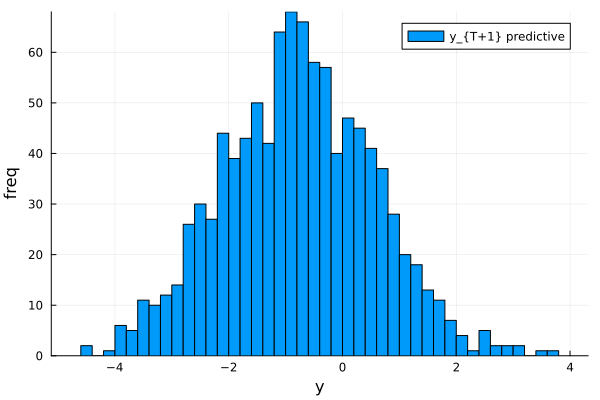

In [9]:
# posterior draws
phi_draw  = vec(Array(chain[:phi]))
s_eta_draw = vec(Array(chain[:s_eta]))
s_eps_draw = vec(Array(chain[:s_eps]))
xT_draw   = vec(Array(chain[Symbol("x[$T]")]))

N = length(phi_draw)
y_pred = similar(phi_draw)

# One-step-ahead posterior predictive for y_{T+1}
for s in 1:N
    x_next   = rand(Normal(phi_draw[s] * xT_draw[s], s_eta_draw[s]))
    y_pred[s] = rand(Normal(x_next, s_eps_draw[s]))
end

@show mean(y_pred) quantile(y_pred, [0.16, 0.50, 0.84])
histogram(y_pred, bins=40, label="y_{T+1} predictive", xlabel="y", ylabel="freq")

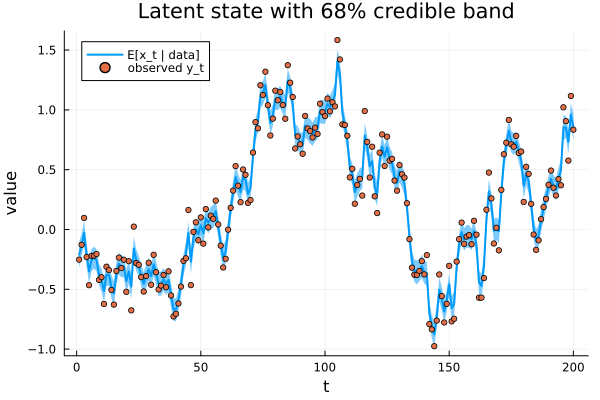

In [15]:
using Statistics, Plots

Tlen = length(y)

get_draws(sym) = vec(Array(chain[sym]))

x_mean = [mean(get_draws(Symbol("x[$t]")))                    for t in 1:Tlen]
x_lo   = [Statistics.quantile(get_draws(Symbol("x[$t]")), 0.16) for t in 1:Tlen]
x_hi   = [Statistics.quantile(get_draws(Symbol("x[$t]")), 0.84) for t in 1:Tlen]

plot(1:Tlen, x_mean;
     ribbon = (x_mean .- x_lo, x_hi .- x_mean),
     label  = "E[x_t | data]",
     lw     = 2, xlabel = "t", ylabel = "value",
     title  = "Latent state with 68% credible band")
scatter!(1:Tlen, y; ms = 3, label = "observed y_t")
